In [1]:
import wapordl
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

bb = [30.0, 28.5, 31.5, 30.5]
folder = "/Users/hmcoerver/Local/wapordl_test"
variable = "L2-AETI-D"
period = ["2018-01-01", "2018-12-31"]

In [2]:
# Download data
fp_a_nc = wapordl.wapor_map(bb, "L2-AETI-A", period, folder, extension = ".nc")
fp_d_nc = wapordl.wapor_map(bb, "L2-AETI-D", period, folder, extension = ".nc", unit_conversion = "dekad")

INFO: Found 1 files for L2-AETI-A.
INFO: Converting from `.tif` to `.nc`.
INFO: Found 36 files for L2-AETI-D.
INFO: Converting units from [mm/day] to [mm/dekad].
INFO: Converting from `.tif` to `.nc`.


In [3]:
# Open dekadal data and sum dekads together.
ds_d = xr.open_dataset(fp_d_nc, decode_coords = "all")
da_d = ds_d.to_array("time").sum(dim = "time")

In [4]:
# Open annual data.
ds_a = xr.open_dataset(fp_a_nc, decode_coords = "all")
da_a = ds_a["Band1"]

Text(0.5, 1.0, 'annual')

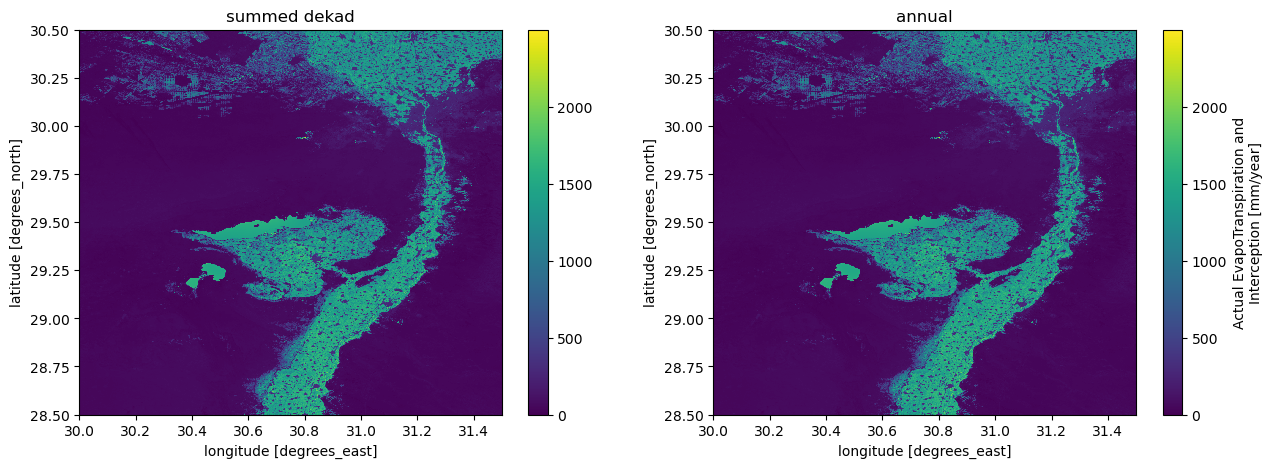

In [5]:
# Make a plot
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
da_d.plot(ax = axs[0])
axs[0].set_title("summed dekad")
da_a.plot(ax = axs[1])
axs[1].set_title("annual")